# Setting

In [7]:
# home path
import sys, os
home_path = os.path.expanduser("~") + '/Desktop/Molecular_kaggle'
sys.path.append(home_path + '/py/')

In [8]:
# module
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import scipy
import pyper
import lightgbm
# import xgboost
from tabulate import tabulate
# from ggplot import *
import warnings
import collections
from scipy.optimize import minimize
from sympy import *
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #seabornライブラリを読み込み、スタイルをセットする
from numpy import linalg as la
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime

# my module 
import importlib
import boosting
import base
importlib.reload(boosting)
importlib.reload(base)

# for instance
Process = base.Process()
Assistance = base.Assistance()
LightGBM = boosting.LightGBM()

## Read csv

In [3]:
# そのまま
train_df, test_df, features = Process.read_data()

4658147 observations and 49 features in train set.
2505542 observations and 49 features in test set.
28 observations and 1 features in features set.


In [ ]:
# r で集約関数利用 (遅い, kernel 使う
r = pyper.R(use_numpy='True',use_pandas='True')
r("source('~/Desktop/Molecular_kaggle/script/aggregate.R, echo=FALSE)")
traind_df = r.get("train")
test_df = r.get("test")

# LightGBM

- lightgbm

In [4]:
# parameters
param_lgb1 = Process.open_parameter(file_name = 'giba_param_lgb')
param_lgb1

# argument
arg1 = {'train' : train_df,
            'test' : test_df,
            'features' : features,
            'param' : param_lgb1,
            'name' : 'Lightgbm base model'}

In [5]:
# model
with base.timer("Light GBM model"):
        mean_log_mae, submit_file = \
        Assistance.split_execute_model(split_value = 'type',
                                                         train=train_df, 
                                                         test=test_df, 
                                                         model=LightGBM.lightgbm, 
                                                         model_arg = arg1)

~~~~~~~~~ type name: 1JHC  ~~~~~~~~~
validation method: GroupKFold(n_splits=5) groups value: molecule_name
fold n°1
Training until validation scores don't improve for 200 rounds.
[200]	training's l1: 1.56822	valid_1's l1: 1.77942
[400]	training's l1: 1.30577	valid_1's l1: 1.6359
[600]	training's l1: 1.13323	valid_1's l1: 1.55454
[800]	training's l1: 1.00921	valid_1's l1: 1.50397
[1000]	training's l1: 0.911789	valid_1's l1: 1.46951
[1200]	training's l1: 0.833073	valid_1's l1: 1.44524
[1400]	training's l1: 0.764371	valid_1's l1: 1.42612
[1600]	training's l1: 0.705651	valid_1's l1: 1.41139
[1800]	training's l1: 0.654397	valid_1's l1: 1.39884
[2000]	training's l1: 0.609349	valid_1's l1: 1.38839
[2200]	training's l1: 0.568639	valid_1's l1: 1.38011
[2400]	training's l1: 0.532449	valid_1's l1: 1.37298
[2600]	training's l1: 0.499286	valid_1's l1: 1.36718
[2800]	training's l1: 0.469259	valid_1's l1: 1.36149
[3000]	training's l1: 0.442252	valid_1's l1: 1.35716
[3200]	training's l1: 0.417429	vali

[1200]	training's l1: 0.14272	valid_1's l1: 0.318116
[1400]	training's l1: 0.128207	valid_1's l1: 0.316113
[1600]	training's l1: 0.115992	valid_1's l1: 0.314536
[1800]	training's l1: 0.105121	valid_1's l1: 0.313353
[2000]	training's l1: 0.0956796	valid_1's l1: 0.312224
[2200]	training's l1: 0.0874266	valid_1's l1: 0.311575
[2400]	training's l1: 0.0800146	valid_1's l1: 0.311084
[2600]	training's l1: 0.0734155	valid_1's l1: 0.31064
[2800]	training's l1: 0.0675791	valid_1's l1: 0.310347
[3000]	training's l1: 0.0623276	valid_1's l1: 0.309985
[3200]	training's l1: 0.0575174	valid_1's l1: 0.309819
[3400]	training's l1: 0.0531769	valid_1's l1: 0.309606
[3600]	training's l1: 0.0492636	valid_1's l1: 0.309485
[3800]	training's l1: 0.0456429	valid_1's l1: 0.309352
[4000]	training's l1: 0.0424144	valid_1's l1: 0.309258
[4200]	training's l1: 0.0394677	valid_1's l1: 0.309185
[4400]	training's l1: 0.0366396	valid_1's l1: 0.309134
[4600]	training's l1: 0.0341418	valid_1's l1: 0.309066
[4800]	training'

[400]	training's l1: 0.151844	valid_1's l1: 0.392082
[600]	training's l1: 0.105076	valid_1's l1: 0.381587
[800]	training's l1: 0.0762595	valid_1's l1: 0.376245
[1000]	training's l1: 0.0570973	valid_1's l1: 0.373438
[1200]	training's l1: 0.0435236	valid_1's l1: 0.371857
[1400]	training's l1: 0.0337138	valid_1's l1: 0.370857
[1600]	training's l1: 0.0265167	valid_1's l1: 0.370272
[1800]	training's l1: 0.0209737	valid_1's l1: 0.369934
[2000]	training's l1: 0.0168517	valid_1's l1: 0.369605
[2200]	training's l1: 0.0136697	valid_1's l1: 0.369453
[2400]	training's l1: 0.0111168	valid_1's l1: 0.369309
[2600]	training's l1: 0.00909889	valid_1's l1: 0.369224
[2800]	training's l1: 0.00750564	valid_1's l1: 0.369128
[3000]	training's l1: 0.00621814	valid_1's l1: 0.369072
[3200]	training's l1: 0.00516727	valid_1's l1: 0.369012
[3400]	training's l1: 0.00431782	valid_1's l1: 0.36898
[3600]	training's l1: 0.00363481	valid_1's l1: 0.368951
[3800]	training's l1: 0.00306284	valid_1's l1: 0.368939
[4000]	tr

[5000]	training's l1: 0.171942	valid_1's l1: 0.614083
[5200]	training's l1: 0.164938	valid_1's l1: 0.61295
[5400]	training's l1: 0.158279	valid_1's l1: 0.611931
[5600]	training's l1: 0.15207	valid_1's l1: 0.610996
[5800]	training's l1: 0.146064	valid_1's l1: 0.61016
[6000]	training's l1: 0.14045	valid_1's l1: 0.609366
[6200]	training's l1: 0.135049	valid_1's l1: 0.608561
[6400]	training's l1: 0.129924	valid_1's l1: 0.60791
[6600]	training's l1: 0.125123	valid_1's l1: 0.607319
[6800]	training's l1: 0.120455	valid_1's l1: 0.606706
[7000]	training's l1: 0.116019	valid_1's l1: 0.606104
[7200]	training's l1: 0.11182	valid_1's l1: 0.60556
[7400]	training's l1: 0.107807	valid_1's l1: 0.605027
[7600]	training's l1: 0.10401	valid_1's l1: 0.604579
[7800]	training's l1: 0.100323	valid_1's l1: 0.604167
[8000]	training's l1: 0.0967847	valid_1's l1: 0.603728
[8200]	training's l1: 0.0933951	valid_1's l1: 0.603375
[8400]	training's l1: 0.0901854	valid_1's l1: 0.603076
[8600]	training's l1: 0.0870784	v

[400]	training's l1: 0.805145	valid_1's l1: 0.903094
[600]	training's l1: 0.726429	valid_1's l1: 0.856749
[800]	training's l1: 0.668457	valid_1's l1: 0.827059
[1000]	training's l1: 0.621582	valid_1's l1: 0.805677
[1200]	training's l1: 0.581669	valid_1's l1: 0.788311
[1400]	training's l1: 0.547831	valid_1's l1: 0.775674
[1600]	training's l1: 0.518604	valid_1's l1: 0.76534
[1800]	training's l1: 0.491598	valid_1's l1: 0.756177
[2000]	training's l1: 0.467194	valid_1's l1: 0.748481
[2200]	training's l1: 0.444721	valid_1's l1: 0.741204
[2400]	training's l1: 0.424333	valid_1's l1: 0.735524
[2600]	training's l1: 0.405496	valid_1's l1: 0.730373
[2800]	training's l1: 0.388293	valid_1's l1: 0.725975
[3000]	training's l1: 0.371804	valid_1's l1: 0.721611
[3200]	training's l1: 0.356721	valid_1's l1: 0.718073
[3400]	training's l1: 0.342505	valid_1's l1: 0.714855
[3600]	training's l1: 0.329099	valid_1's l1: 0.711805
[3800]	training's l1: 0.316522	valid_1's l1: 0.709027
[4000]	training's l1: 0.304743	v

[7400]	training's l1: 0.000443948	valid_1's l1: 0.242472
Early stopping, best iteration is:
[7336]	training's l1: 0.000459255	valid_1's l1: 0.242472
fold n°2
Training until validation scores don't improve for 200 rounds.
[200]	training's l1: 0.181621	valid_1's l1: 0.275036
[400]	training's l1: 0.123853	valid_1's l1: 0.257661
[600]	training's l1: 0.0907254	valid_1's l1: 0.250953
[800]	training's l1: 0.0690901	valid_1's l1: 0.246901
[1000]	training's l1: 0.0539084	valid_1's l1: 0.244128
[1200]	training's l1: 0.0427186	valid_1's l1: 0.242601
[1400]	training's l1: 0.0343062	valid_1's l1: 0.241428
[1600]	training's l1: 0.027839	valid_1's l1: 0.240795
[1800]	training's l1: 0.022827	valid_1's l1: 0.240331
[2000]	training's l1: 0.0189044	valid_1's l1: 0.239975
[2200]	training's l1: 0.0156573	valid_1's l1: 0.239701
[2400]	training's l1: 0.0130729	valid_1's l1: 0.239541
[2600]	training's l1: 0.0109879	valid_1's l1: 0.239379
[2800]	training's l1: 0.00928283	valid_1's l1: 0.239307
[3000]	training'

In [10]:
# result (Mean Log MAE)
print("Lightgbm normal validation Mean log MAE: %.4f" % np.mean(mean_log_mae))
# submit
Process.submit(submit_file ,tech = "lightgbm_giba_output")

Lightgbm normal validation Mean log MAE: -0.6860


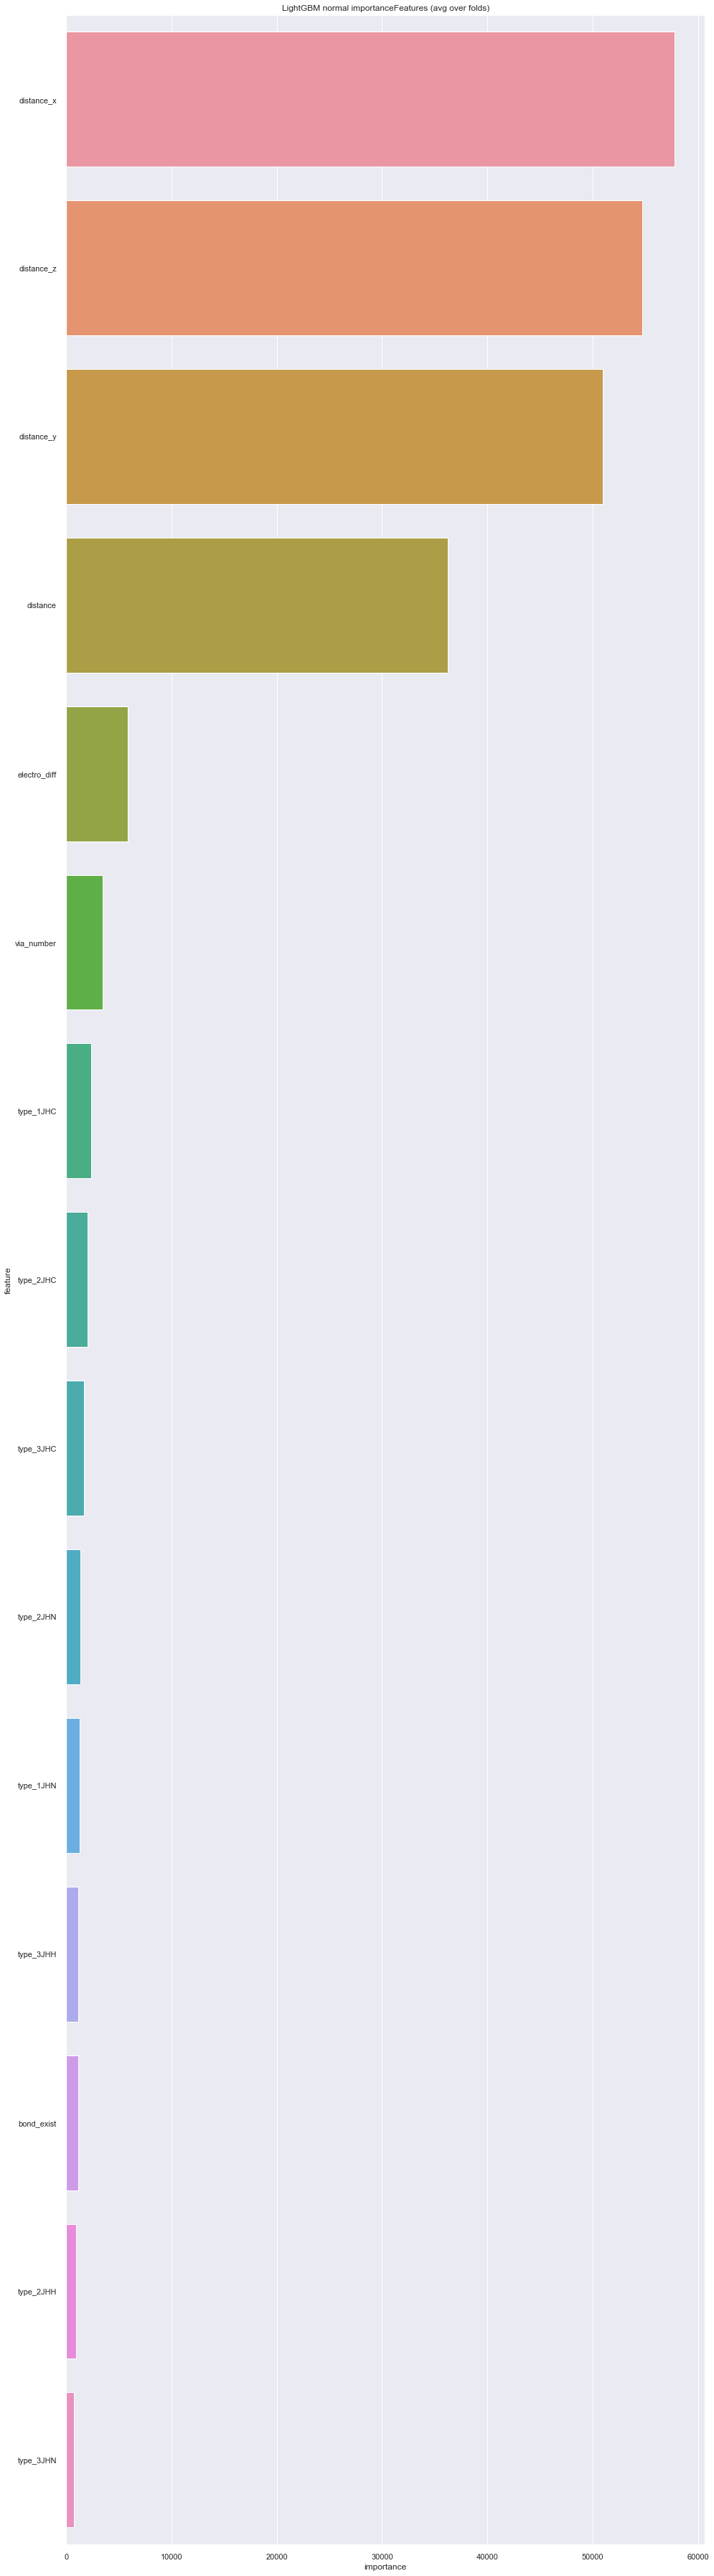

In [64]:
# importance  (要考察, 上記の関数だと importance持ってきていない)
Process.display_importances(lgb_importance,title="LightGBM normal importance",file_name = None)